In [1]:
from matplotlib import pyplot as plt
from ietk import methods
from ietk import util
from ietk.data import IDRiD


In [2]:
img_path = "../data/Training_Set/Training/1.png"
import cv2

In [9]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
I, fg = util.center_crop_and_get_foreground_mask(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


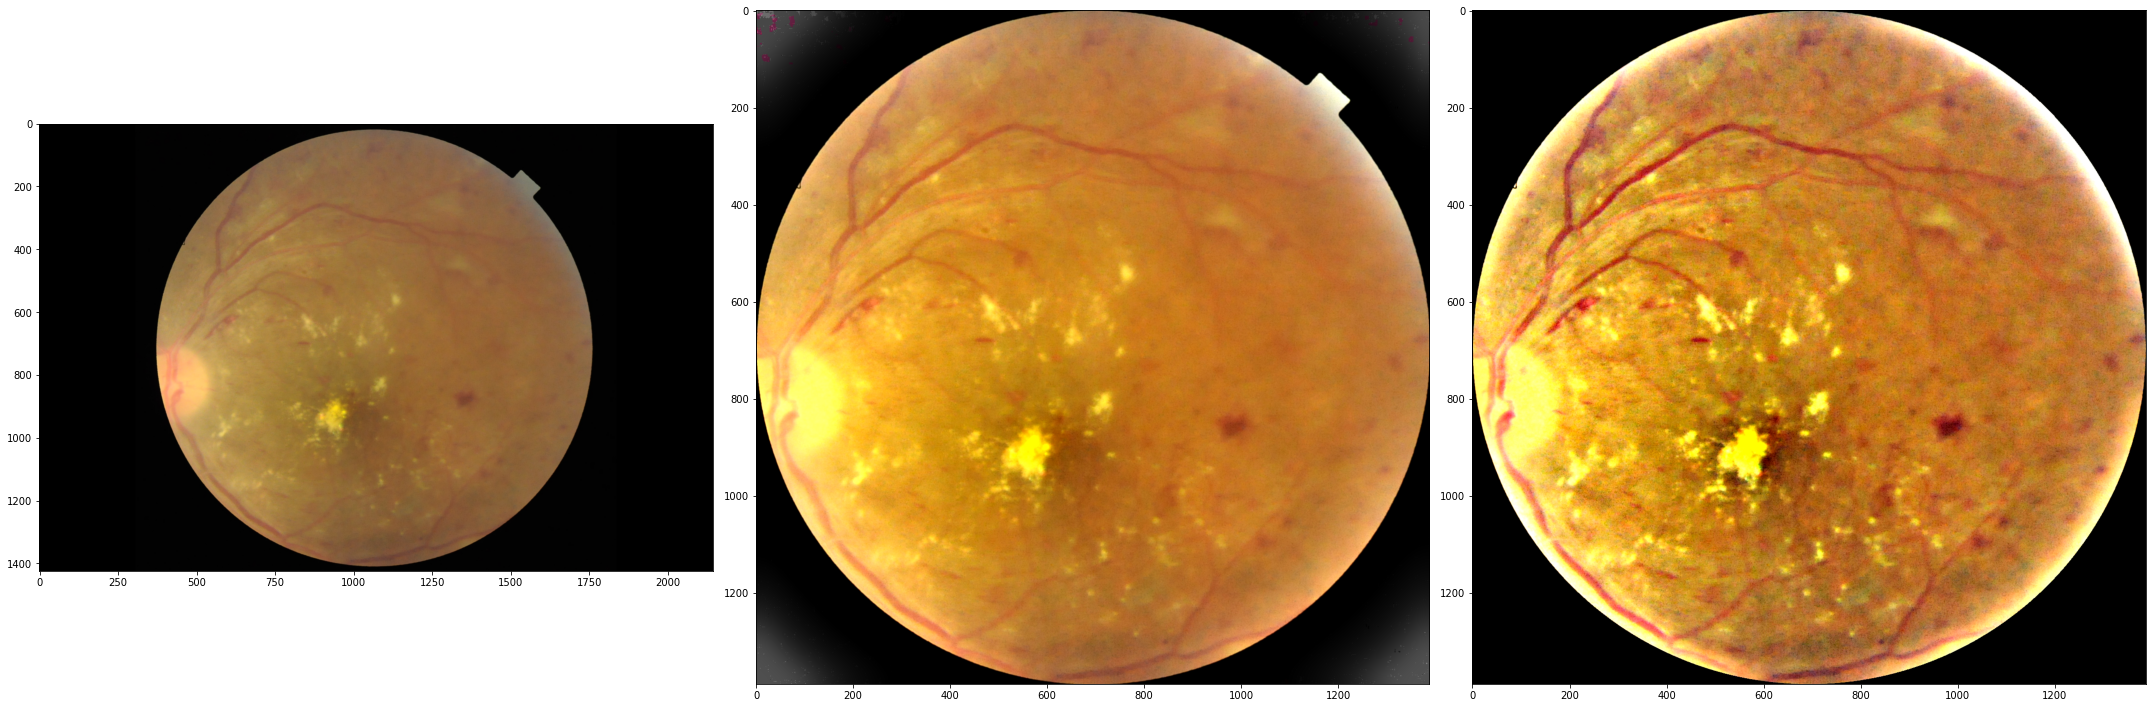

In [20]:
enhanced_img = methods.brighten_darken((I.astype(float) / 255), 'A+B+X', focus_region=fg)
enhanced_img2 = methods.sharpen(enhanced_img, bg=~fg)

# plot results

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 90))
ax1.imshow(img)
ax2.imshow(enhanced_img)
ax3.imshow(enhanced_img2)
f.tight_layout()

In [23]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

In [24]:
memo = enhanced_img2.copy()

In [27]:
memo.shape

(1388, 1388, 3)

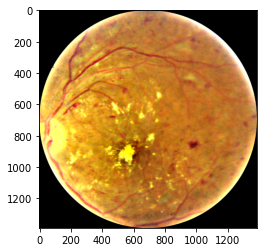

In [39]:
plt.imshow(np.clip(enhanced_img2, 0, 1))

In [40]:
np.clip(enhanced_img2, 0, 1).min()

0.0